In [1]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [2]:

d= pd.read_excel (r'E:\data set\1.xlsx')
d.to_csv (r'E:\data set\salesworkload.csv', index = None, header=True)

In [3]:
d.isna().sum()
d.dropna(inplace=True)

In [4]:
data=d['class3'] = np.where(d['Sales units']>=1.076471e+06,1 ,0 )

data=d['class2'] = np.where(d['Turnover']>=3.721393e+06,1 ,0 )

data= d[['Sales units',  'Turnover','class2','class3']]
data.head(3)


,Sales units,Turnover,class2,class3
0,398560.0,1226244.0,0,0
1,82725.0,387810.0,0,0
2,438400.0,654657.0,0,0


In [5]:
dat=d['class2'] = np.where(d['Turnover']>=3.721393e+06,1 ,0 )
dat=d['class1'] = np.where(d['Turnover']>=3.721393e+06, 'good', 'bad')
dat= d[['Opening hours',  'Turnover','class1','class2']]
dat.head(3)

,Opening hours,Turnover,class1,class2
0,Type A,1226244.0,bad,0
1,Type A,387810.0,bad,0
2,Type A,654657.0,bad,0


In [6]:
import math
def entropy(target_col):
    
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

In [7]:
def InfoGainratio(data,split_attribute_name,target_name="class"):
    
    #Calculate the entropy of the total dataset
    total_entropy = entropy(data[target_name])
    
    ##Calculate the entropy of the dataset
    
    #Calculate the values and the corresponding counts for the split attribute 
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    #Calculate the weighted entropy
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    #Calculate the information gain ratio
    Information_Gain = total_entropy - Weighted_Entropy
    
    #threshold_splitinfo = -subset1_probability * math.log(subset1_probability, 2)-subset2_probability*math.log(subset2_probability, 2)
    #gainratio = Information_Gain/ threshold_splitinfo
    
    return Information_Gain
def algo(data,originaldata,features,target_attribute_name="class",parent_node_class = None):
    
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    elif len(features) ==0:
        return parent_node_class
    
    else:
        
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_values = [InfoGainratio(data,feature,target_attribute_name) for feature in features] #Return the information gain values for the features in the dataset
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = algo(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            

In [8]:
from pprint import pprint
def algo(data,originaldata,features,target_attribute_name="class2",parent_node_class = None):
    
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]
    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    
    elif len(features) ==0:
        return parent_node_class
    
    else:
        
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        item_values = [InfoGainratio(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        tree = {best_feature:{}}
        features = [i for i in features if i != best_feature]
        
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = algo(sub_data,data,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)    
                

In [9]:
def predict(query,tree,default = 1):
    
    for key in list(query.keys()):
        if key in list(tree.keys()):
            
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            result = tree[key][query[key]]
            
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result


In [10]:
def train_test_split(data):
    training_data = data.iloc[:80].reset_index(drop=True)
    
    testing_data = data.iloc[80:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(data)[0]
testing_data = train_test_split(data)[1] 

def test(data,tree):
    
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    
    predicted = pd.DataFrame(columns=["predicted"]) 
    
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["class3"])/len(data))*100,'%')

In [11]:
tree = algo(training_data,training_data,training_data.columns[:-1])
pprint(tree)
test(testing_data,tree)

{'Sales units': {0.0: 0.0,
                 5.0: 0.0,
                 10.0: 0.0,
                 15.0: 0.0,
                 20.0: 0.0,
                 120.0: 0.0,
                 2795.0: 0.0,
                 41520.0: 0.0,
                 48085.0: 0.0,
                 52015.0: 0.0,
                 53330.0: 0.0,
                 54915.0: 0.0,
                 55420.0: 0.0,
                 58920.0: 0.0,
                 59260.0: 0.0,
                 64370.0: 0.0,
                 76875.0: 0.0,
                 82725.0: 0.0,
                 82835.0: 0.0,
                 130240.0: 0.0,
                 144460.0: 0.0,
                 165515.0: 0.0,
                 167015.0: 0.0,
                 177730.0: 0.0,
                 181105.0: 0.0,
                 213680.0: 0.0,
                 216925.0: 0.0,
                 234065.0: 0.0,
                 235375.0: 0.0,
                 253660.0: 0.0,
                 305310.0: 0.0,
                 309260.0: 0.0,
               

In [12]:
train_features = data.iloc[:80,:-1]
test_features = data.iloc[80:,:-1]
train_targets = data.iloc[:80,-1]
test_targets = data.iloc[80:,-1]
tree = DecisionTreeClassifier(criterion = 'entropy').fit(train_features,train_targets)
prediction = tree.predict(test_features)
print("The prediction accuracy is: ",tree.score(test_features,test_targets)*100,"%")

The prediction accuracy is:  99.98678996036988 %


In [13]:

from sklearn import linear_model
from sklearn import metrics                                           #logistic regression
from sklearn.model_selection import train_test_split

In [14]:
feature_cols = ['class2','class3','Sales units','Turnover']
X = data[feature_cols] # Features
y = data.class3

In [15]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [16]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.31102979613173026
Precision: 0.26327557294577975
Recall: 1.0


In [18]:
feature_cols = ['class2','class3','Sales units','Turnover']
X = data[feature_cols] # Features
y = data.class2

In [19]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [20]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [21]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.5441714584422374
Precision: 0.34779356768885566
Recall: 1.0


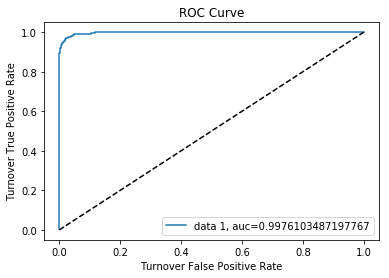

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Turnover False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X, y)

# Print the tuned parameter and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 1e-05}
Best score is 0.5526797385620915


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

NotFittedError: Call fit before prediction